In [190]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Régression linéaire 

## S1

In [191]:
def generator_noisy_linear(parameters:tuple, n, sigma):
    x = [random.uniform(0,1) for _ in range(n)]
    x = np.array(x)
    
    eps = [random.gauss(0,sigma) for _ in range(n)]
    eps = np.array(eps)
    
    return x, parameters[0] + parameters[1]*x + eps, eps

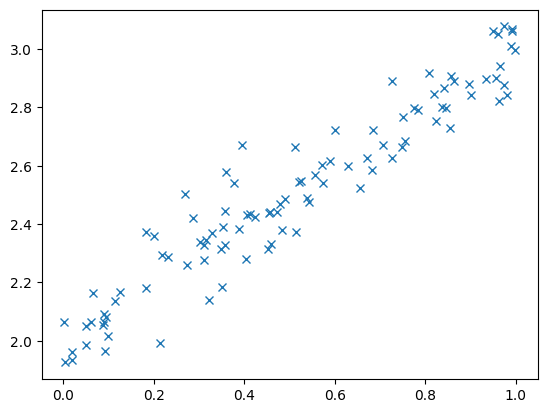

In [192]:
initial_beta = (2, 1)
n = 100
sigma = 0.1
dataset = generator_noisy_linear(initial_beta, n, sigma)
plt.plot(dataset[0], dataset[1], 'x')

## T1

On dispose le modèle linéare
$$ y_i = \beta_0 + \beta_1x_i+\varepsilon_i $$

Comme $\varepsilon_i$ est une variable aléatoire gaussienne centrée de variance $\sigma^2 > 0$, on l'exprime avec la variable $y_i$ et la variable fixe $x_i$

$$ \varepsilon_i = y_i - \left(\beta_0 + \beta_1x_i\right) \sim \mathcal{N}(0, \sigma^2)$$

D'où

$$ \frac{\varepsilon_i}{\sigma} = \frac{y_i - \left(\beta_0 + \beta_1x_i\right)}{\sigma} \sim \mathcal{N}(0, 1)$$

$(\epsilon_i)_{i \ge 1}$ étant indépendentes, $(\frac{\epsilon_i}{\sigma})_{i \ge 1}$ l'est aussi, donc on a

$$ \frac{\varepsilon}{\sigma} = \frac{y - X\beta}{\sigma} \sim \mathcal{N}(\pmb{0}, \pmb{I})$$

On obtient ainsi la loi de $y$

$$ y \sim \mathcal{N}(X\beta, \sigma^2\pmb{I}) $$

Finalement

$$ p(y) = (2\pi\sigma^2)^{-n/2}\displaystyle\exp\left(-\frac{||y - X\beta||^2}{2\sigma^2}\right)$$

## T2

L'estimateur du maximum de vraisemblance

$$ \hat\beta \in \arg \min_{\beta\in\mathbb{R}^2}||y - X\beta||^2 $$

Vérifions d'abord que la fonction $\beta \rightarrow ||y - X\beta||^2$ soit convexe et différentiable sur $\mathbb{R}^2$:

Soit $\beta_1, \beta_2 \in \mathbb{R}^2$, soit $t \in [0, 1]$, alors on a selon l'inégalité triangulaire

$$||y - X(t\beta_1 + (1-t)\beta_2)||^2 \le (|t| \cdot ||y - X\beta_1|| + |1-t| \cdot ||y - X\beta_2||)^2 \le t^2||y - X\beta_1||^2 + (1-t)^2||y - X\beta_2||^2$$

Or, on a $t^2 \le t$ et $(1-t)^2 \le 1-t$ pour tout $t \in [0, 1]$

$$||y - X(t\beta_1 + (1-t)\beta_2)||^2 \le (|t| \cdot ||y - X\beta_1|| + |1-t| \cdot ||y - X\beta_2||)^2 \le t||y - X\beta_1||^2 + (1-t)||y - X\beta_2||^2$$

Donc cette fonction est convexe.

Puis, on calcule

$$\frac{\partial ||y - X\beta||^2}{\partial \beta_1} = -X 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\left(y - X\beta\right)^{\text T} - 
\begin{pmatrix}
0 & 1
\end{pmatrix}
X^{\text T}(y - X\beta)$$

$$\frac{\partial ||y - X\beta||^2}{\partial \beta_2} = -X 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
\left(y - X\beta\right)^{\text T} - 
\begin{pmatrix}
1 & 0
\end{pmatrix}
X^{\text T}(y - X\beta)$$

Les deux dérivées partielles soient continues sur $\mathbb{R}^2$, on sait que cette fonction est différentiable sur $\mathbb{R}^2$.

Si $\hat\beta$ satisfait (4.2), il suffit que

$$ \nabla_{\beta} ||y - X\beta||^2 (\hat\beta) = 0 $$

$$ \nabla_{\beta} \left(y - X\beta\right)^{\text T} (y - X\beta) (\hat\beta) = 0 $$

Ainsi

$$ \nabla_{\beta} \left(y^{\text T}y - 2y^{\text T} X\beta + X^{\text T}X\beta^{\text T}\beta\right) (\hat\beta) = 0 $$

$$ - 2y^{\text T}X  + 2X{^\text T}X\hat\beta = 0 $$

$$ X{^\text T}X\hat\beta = X^{\text T}y $$

Ce qui implique que ${\rm Im} (X ^ {\text T}X) = {\rm Im} (X ^ {\text T})$, et l'ensemble des solutions $\arg \min_{\beta\in\mathbb{R}^2}||y - X\beta||^2$ est celui du système linéaire:

$$ X{^\text T}X\hat\beta = X^{\text T}y $$

où $\hat\beta \in \mathbb{R}^2$ est l'inconnu.




## T3

On a pout tout $1 \le i \le n$,

$$ y_i = \beta_0 + \beta_1x_i+\varepsilon_i = (X\beta)_i +\varepsilon_i$$

Donc, on a bien
$$y = X\beta + \varepsilon$$

Si $X$ et $\beta$ sont fixés, d'après **T1**, 
$$ y \sim \mathcal{N}(X\beta, \sigma^2\pmb{I}) $$

Comme on a $\hat\beta = (X{^\text T}X)^{-1}X^{\text T}y$ et $y = X\beta + \varepsilon$,

$$ \mathbb E[\hat\beta] = \mathbb E[(X{^\text T}X)^{-1}X^{\text T}\left(X\beta + \epsilon\right)] = \mathbb E[(X{^\text T}X)^{-1}X^{\text T}X\beta] + \mathbb E[(X{^\text T}X)^{-1}X^{\text T}\epsilon] $$

Si $X$ et $\beta$ sont fixés, $\mathbb E[X\beta] = X\beta$, par construction $E[\epsilon] = 0$,

$$ \mathbb E[\hat\beta] = \underbrace{(X{^\text T}X)^{-1}X^{\text T}X}_{Id}\beta = \beta$$

On peut dire que l'estimateur $\hat\beta$ est non-biaisé.

## T4

Remarquons que

$$ \hat \beta - \beta = (X{^\text T}X)^{-1}X^{\text T}y - \beta = (X{^\text T}X)^{-1}X^{\text T}(X\beta + \varepsilon) - \beta = \underbrace{(X{^\text T}X)^{-1}X^{\text T}X}_{Id}\beta + (X{^\text T}X)^{-1}X^{\text T}\varepsilon - \beta = (X{^\text T}X)^{-1}X^{\text T}\varepsilon $$

$$ X(\hat \beta - \beta) = X(X^{\text T}X)^{-1}X^{\text T}\varepsilon = X X^{-1} (X^{\text T})^{-1}X^{\text T}\varepsilon = \varepsilon $$

Donc, on a

$$\frac{(\hat \beta - \beta)^{\text T}X^{\text T}X(\hat \beta - \beta)}{\sigma^2} = \frac{(X(\hat \beta - \beta))^{\text T}X(\hat \beta - \beta)}{\sigma^2} = \frac{\varepsilon^{\text T}\varepsilon}{\sigma^2} = \sum_{i=1}^{n} (\frac{\varepsilon_i}{\sigma})^2 $$

Pour tout $1 \le i \le n$, $\varepsilon_i \sim \mathcal{N}(0,\sigma^2)$, donc $\cfrac{\varepsilon_i}{\sigma} \sim \mathcal{N}(0,1)$

On montre que
$$\sigma^{-2}(\hat \beta - \beta)^{\text T}X^{\text T}X(\hat \beta - \beta) \sim \chi^2(n)$$

Puis,

$$\mathbb{P}(\beta \in \mathcal{E}_{\alpha}) = \mathbb{P}(\sigma^{-2}(\beta - \hat \beta)^{\text T}X^{\text T}X(\beta - \hat \beta) \le q_{\chi^2(n)}(1-\alpha)) = \mathbb{P}(\sigma^{-2}(\hat \beta - \beta)^{\text T}X^{\text T}X(\hat \beta - \beta) \le q_{\chi^2(n)}(1-\alpha))$$

Selon la définition du quantile, en notant $F_{\chi^2(n)}$ la fonction de répartition d'une variable aléatoire suivant une loi du $\rm{Chi}^2$ à $n$ degré de liberté, on a
$$q_{\chi^2(n)}(1-\alpha) = \inf{\{x \in \mathbb{R}, F_{\chi^2(n)}(x) \ge 1-\alpha\}}$$

Il est immédiat que
$$\mathbb{P}(\beta \in \mathcal{E}_{\alpha}) = 1 - \alpha$$

## S2

In [193]:
from scipy.stats import chi2


def matrix_calc(dataset):
    ones = np.ones_like(dataset[0])
    ones = np.expand_dims(ones, axis=0)

    X_T = np.expand_dims(dataset[0], axis=0)
    X_T = np.concatenate((ones, X_T), axis=0)
    X = np.transpose(X_T)

    X_T0X = np.matmul(X_T, X)
    X_T0y = np.matmul(X_T, dataset[1])

    beta_hat = np.linalg.inv(X_T0X)@X_T0y

    return X, X_T, X_T0X, X_T0y, beta_hat


def quantile(r, n=2):
    chi_squared = chi2(n)
    return chi_squared.ppf(r)

def chi_2(beta_wave, beta_hat, X_T0X, sigma=sigma):
    return 1/sigma**2 * np.transpose(beta_wave - beta_hat)@X_T0X@(beta_wave - beta_hat)

def ellipsoid(dataset, r=0.95):
    matrices = matrix_calc(dataset)

    _quantile = quantile(r)
    beta0 = np.arange(-3,3,0.01)
    beta1 = np.arange(-3,3,0.01)

    ellipsoid_x = np.zeros_like(beta0)
    ellipsoid_y = np.zeros_like(beta0)

    i = 0

    for _beta0 in beta0:
        for _beta1 in beta1:
            if chi_2(np.array([_beta0, _beta1]), matrices[4], matrices[2]) < _quantile:
                ellipsoid_x[i], ellipsoid_y[i]  = _beta0, _beta1
                i += 1
    
    return ellipsoid_x[:i], ellipsoid_y[:i]

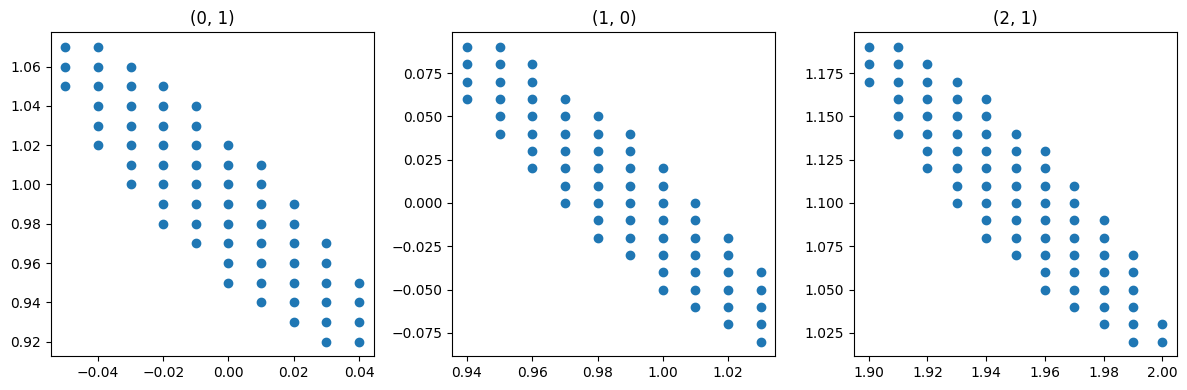

In [194]:
betas = [(0,1), (1,0), (2,1)]

fig, axs = plt.subplots(1, len(betas),figsize=(12, 4))

for x in range(len(betas)):
    dataset = generator_noisy_linear(betas[x], n, sigma)
    ell = ellipsoid(dataset)
    axs[x].scatter(ell[0], ell[1])
    axs[x].set_title(betas[x])

fig.tight_layout()

## T5

D'après le calcul on a
$$(X^n)^{\text T}X^n = 
\begin{pmatrix}
n & \sum_{i=1}^{n} x_i \\
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_{i}^2
\end{pmatrix}
$$
et
$$(X^n)^{\text T}\varepsilon^n =
\begin{pmatrix}
\sum_{i=1}^{n} \varepsilon_i \\
\sum_{i=1}^{n} x_i \varepsilon_{i}
\end{pmatrix}
$$

On sait que ${\left(x_i\right)}_{i>=1}$ est une suite de variables i.i.d. et suivent la loi uniforme sur $\left(0, 1\right)$, donc intégrables. On a
$$\mathbb E[x_1] = \frac{1}{2}$$

D'après la loi des grands nombres,
$$\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_i} = \frac{1}{2} \; p.s.$$

De même, on peut calculer les espérances:
$$\mathbb E[x_1^2] = \int_{\mathbb{R}} {x^2} \mathbb{I}_{[0,1]} \,{\rm d}x = \int_0^1 {x^2} \,{\rm d}x = \frac{1}{3}$$
$$\mathbb E[\varepsilon_1] = 0$$
$$\mathbb E[x_1 \varepsilon_1] = \mathbb E[x_1] \mathbb E[\varepsilon_1] = 0$$

Puisque ${\left(x_{i}^2\right)}_{i>=1}$, ${\left(\varepsilon_i\right)}_{i>=1}$ et ${\left(x_i \varepsilon_{i}\right)}_{i>=1}$ sont aussi i.i.d. et intégrables, appliquons la loi des grands nombres sur chacune de ces suites.
$$\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_{i}^2} = \frac{1}{3} \; p.s.$$
$$\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} \varepsilon_i} = 0 \; p.s.$$
$$\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_i \varepsilon_{i}} = 0 \; p.s.$$

Donc,
$$ \lim_{n \rightarrow \infty} {\frac{1}{n}(X^n)^{\text T}X^n} =
\begin{pmatrix}
1 & \lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_i} \\
\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_i} & \lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_{i}^2}
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 / 2 \\
1 / 2 & 1 / 3
\end{pmatrix} $$

$$ \lim_{n \rightarrow \infty} {\frac{1}{n}(X^n)^{\text T}\varepsilon^n} =
\begin{pmatrix}
\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} \varepsilon_i} \\
\lim_{n \rightarrow \infty}{\frac{1}{n} \sum_{i=1}^{n} x_i \varepsilon_{i}}
\end{pmatrix}
= \pmb{0} $$

## S3

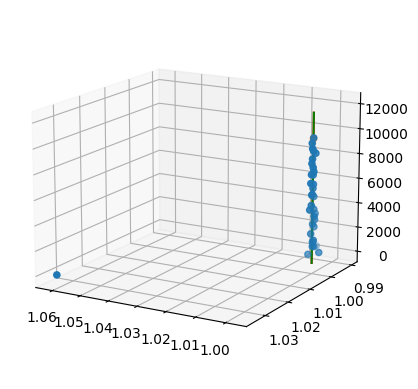

In [195]:
n = 10000
initial_beta = (1, 1)
betas_n = np.zeros([n, 2])
betas_n[0] = initial_beta

i = 0
for x in range(1, n, 300):
    dataset = generator_noisy_linear(initial_beta, 10*x, sigma)
    betas_n[i] = matrix_calc(dataset)[4]
    i += 1
    
betas_n = betas_n[:i]

x_arr = betas_n[:, 0]
y_arr = betas_n[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_arr, y_arr, range(1, n, 300))
ax.scatter(initial_beta[0], initial_beta[1], 10000, 'bo')
ax.plot([initial_beta[0], initial_beta[0]], [initial_beta[1], initial_beta[1]],
        [0, 1.2*n], color='red')
ax.plot([initial_beta[0], initial_beta[0]], [initial_beta[1], initial_beta[1]],
        [0, 1.2*n], color='green')

ax.view_init(elev=15, azim=120)

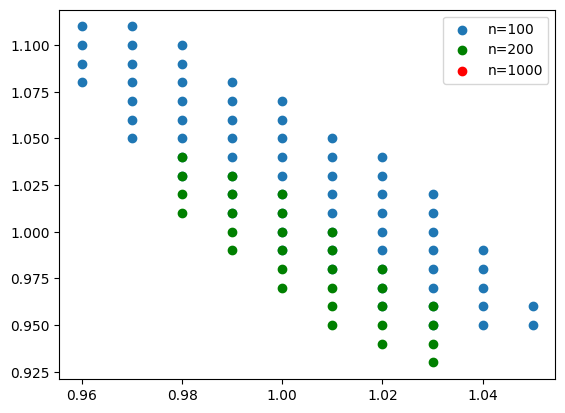

In [196]:

dataset1 = generator_noisy_linear(initial_beta, 10000, sigma)
ell1 = ellipsoid(dataset1)
dataset3 = generator_noisy_linear(initial_beta, 200, sigma)
ell3 = ellipsoid(dataset3)
dataset2 = generator_noisy_linear(initial_beta, 100, sigma)
ell2 = ellipsoid(dataset2)
plt.scatter(ell2[0], ell2[1], label='n=100')
plt.scatter(ell3[0], ell3[1], color='green', label='n=200')
plt.scatter(ell1[0], ell1[1], color='red', label='n=1000')
plt.legend()
plt.show()

# Régression non-linéaire 

## S4

In [197]:
def f(parameters, x):
    return 1 / (1 + np.exp(-parameters[0]-parameters[1]*x)
)
def generator_noisy_non_linear(parameters:tuple, n, sigma):
    x = [random.uniform(-3,3) for _ in range(n)]
    x = np.array(x)
    
    eps = [random.gauss(0,sigma) for _ in range(n)]
    eps = np.array(eps)
    
    return x, f(parameters, x) + eps, eps

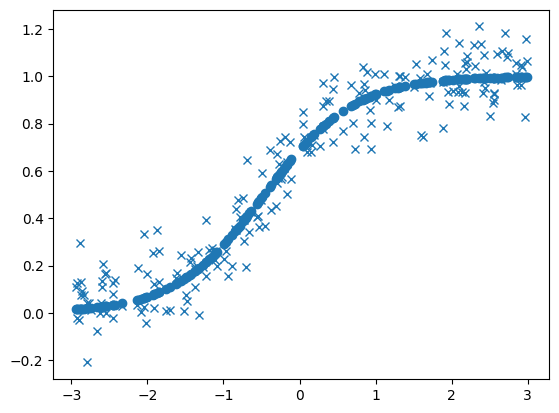

In [198]:
dataset = generator_noisy_non_linear((0.8, 1.7), 200, 0.1)
plt.plot(dataset[0], dataset[1], 'x')
plt.scatter(dataset[0], f((0.8, 1.7), dataset[0]))

## T6

Pout tout $1 <= i <= n$, on a
$$y_i = \frac{1}{1 + \exp(-\theta_0 - \theta_1x_i)} + \varepsilon_i$$
$$\varepsilon_i = y_i - \frac{1}{1 + \exp(-\theta_0 - \theta_1x_i)} = y_i - f(\theta, x_i) \sim \mathcal{N}(0, \sigma^2)$$

Quand les données $\left(x_i, y_i\right)_{1 \le i \le n}$ sont fixées, $y_i - f(\theta, x_i)$ est une fonction de $\theta$, on peut définir la vraisemblance comme
$$p_i(\theta) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{|y_i - f(\theta, x_i)|^2}{2\sigma^2}\right)}$$

qui correspond à la probabilité pour une variable aléatoire gaussienne centrée de variance $\sigma^2 > 0$ d'être égale à $y_i - f(\theta, x_i)$.

Donc la vraisemblance totale vaut

$$p(\theta) = \prod_{i = 1}^{n} p_i(\theta) = \frac{1}{(2\pi\sigma^2)^{n / 2}} \exp{\left(-\frac{\sum_{i = 1}^{n} |y_i - f(\theta, x_i)|^2}{2\sigma^2}\right)}$$

C'est une fonction décroissante de $\sum_{i = 1}^{n} |y_i - f(\theta, x_i)|^2$, donc on a
$$\arg \max_{\theta\in\mathbb{R}^2}p(\theta) = \arg \min_{\theta\in\mathbb{R}^2} \sum_{i = 1}^{n} |y_i - f(\theta, x_i)|^2 = \arg \min_{\theta\in\mathbb{R}^2} \frac{1}{n}\sum_{i = 1}^{n} |y_i - f(\theta, x_i)|^2$$

Finalement on obtient
$$\hat \theta \in \arg \min_{\theta\in\mathbb{R}^2} L(\theta)$$


## S5

In [199]:
def loss_function(parameters:tuple, x, y):
    ans = 0
    for xi, yi in zip(x, y):
        ans += (yi - f(parameters, xi)) ** 2
    return ans / len(x)

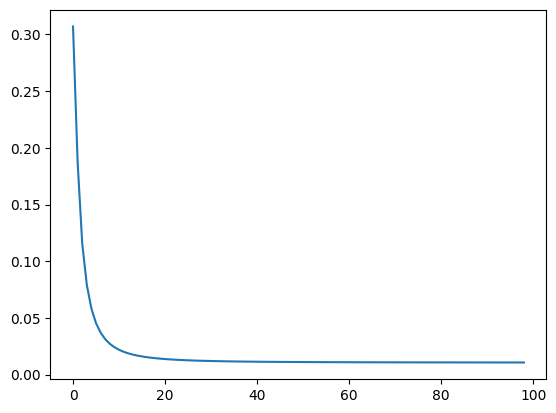

In [203]:
n = 100
params = np.array([np.array([0.8 + 10/x, 1.7 + 1/x]) for x in range(1, n)])
losses_values = np.zeros(n)
i = 0

for x in range(len(params)):
    losses_values[i] = loss_function(params[i], dataset[0], dataset[1])
    i+=1

plt.plot(losses_values[:i])
plt.show()

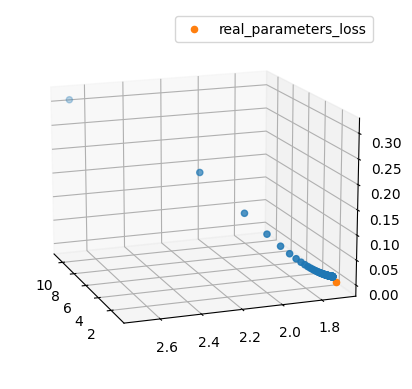

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(params[:, 0], params[:, 1], losses_values[:i])
ax.scatter(0.8, 1.7, 0, label='real_parameters_loss')
ax.view_init(elev=15, azim=-200)
ax.legend()

## S6

In [135]:
def G(parameters, x, y):
    return np.array([2*(f(parameters, x) - y)*f(parameters, x)**2*np.exp(-parameters[0] - parameters[1] * x),
                     2*(f(parameters, x) - y)*f(parameters, x)**2*np.exp(-parameters[0] - parameters[1] * x)*x])
    

def m_gradient(parameters, dataset, m, replace=False):
    random_indices = np.random.choice(len(dataset[0]), size=m, replace=replace)
    ans = np.zeros(2)
    for i in random_indices:
        ans += G(parameters, dataset[0][i], dataset[1][i])
    
    return ans / m, random_indices

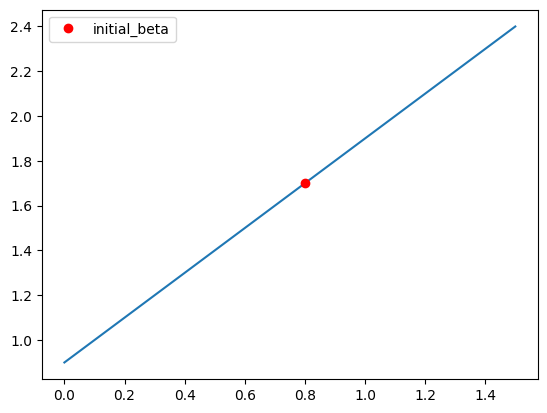

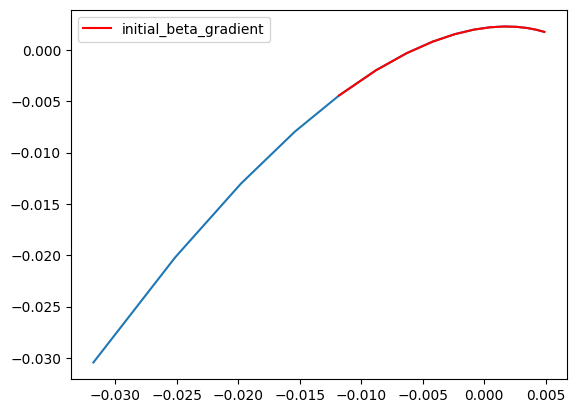

In [172]:
params_0 = np.expand_dims(np.arange(0,1.6, 0.1), axis=0)
params_1 = np.expand_dims(np.arange(0.9,2.5, 0.1), axis=0)

params = np.concatenate((params_0, params_1), axis=0)
params = np.transpose(params)
m_grads = np.zeros_like(params)

for x in range(len(m_grads)):
    m_grads[x] = m_gradient(params[x], dataset, 200)[0]

plt.plot(params[:, 0], params[:, 1])
plt.plot(0.8, 1.7, 'o', color='red', label='initial_beta')
plt.legend()
plt.show()

plt.plot(m_grads[:, 0], m_grads[:, 1])
plt.plot(m_grads[:, 0][4:], m_grads[:, 1][4:], color='red', label='initial_beta_gradient')
plt.legend()
plt.show()

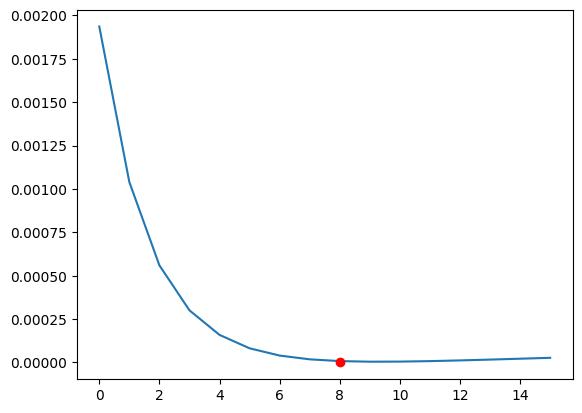

In [165]:
plt.plot(range(len(m_grads[:, 0])), m_grads[:, 0]**2 + m_grads[:, 1]**2)
plt.plot(8, 0, 'o', color='red')
plt.show()

## T7

- Tirage avec remplacement

On note $m_i$ le i-ième indice dans $I_m$ avec $1 \le i \le m$.

Comme $I_m$ est constitué de $m$ indices tirés de manière indépendente et uniforme dans $\{1, ..., n\}$, alors pour tout $1 \le i \le m$, $m_i$ suit une loi uniforme sur $\{1, ..., n\}$.

On obtient
$$\forall i \in \mathbb{N}^*, i <= m, \mathbb E(G_{m_i}) = \frac{1}{n} \sum^{n}_{i = 1} G_i = g(\theta) $$

Donc, on a
$$ \mathbb E(g_{m}(\theta)) = \mathbb E(\frac{1}{m} \sum_{j \in I_m} G_j) = \mathbb E(\frac{1}{m} \sum_{i = 1}^{m} G_{m_i}) = \frac{1}{m} \sum_{i = 1}^{m} \mathbb E(G_{m_i}) = g(\theta) $$


- Tirage sans remplacement

Supposons $m$ donné, pour une tirage avec remplacement, chaque partie de $m$ éléments de l'ensemble $\{1, ..., n\}$ a une chance de $1 / \tbinom{n}{m} $ d'être tirée.

Notons $\mathbb{T}_m$ l'ensemble de tirages possibles, par un dénombrement, on peut déduire que
$${\rm Card} \left( \mathbb{T}_m \right) = \tbinom{n}{m}$$
et
$$\forall k \in \mathbb{N}^*, k \le n, \sum_{T \in \mathbb{T}_m} \mathbb{I}_{k \in T} = \tbinom{n - 1}{m - 1} $$

Donc, on a
$$ \mathbb E(g_{m}(\theta)) = \frac{1}{\tbinom{n}{m}} \sum_{T \in \mathbb{T}_m} \left( \frac{1}{m} \sum_{t \in T} G_t \right) $$

En changeant l'ordre des deux sommes, on obtient
$$ \mathbb E(g_{m}(\theta)) = \frac{1}{\tbinom{n}{m}m} \sum_{t = 1}^{n} \sum_{T \in \mathbb{T}_m} \mathbb{I}_{t \in T}G_{t} = \frac{1}{\tbinom{n}{m}m} \sum_{t = 1}^{n} \tbinom{n - 1}{m - 1} G_{t} = \frac{1}{n} \sum_{t = 1}^{n} G_{t} = g(\theta) $$



## T8

On note $g(\theta)_0, g(\theta)_1$ les deux éléments du vecteur colonne $g(\theta)$, puisque l'on a montré dans **T7** que

$$\forall i \in \mathbb{N^{*}}, i \le n, \mathbb E (G_i) = g(\theta)$$

donc on a

$$ \mathbb E(2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0}) = g(\theta)_0 $$
$$ \mathbb E(2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1}) = g(\theta)_1 $$

On écrit $g_{m}(\theta)$ et $\Sigma(\theta)$ sous forme d'une matrice

$$ g_{m}(\theta) = \frac{1}{m} \sum_{j \in I_m} G_j = \frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \nabla_{\theta} f(\theta, x_j) =
\begin{pmatrix}
\frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \frac{\partial f(\theta, x_j)}{\partial \theta_0} \\
\frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \frac{\partial f(\theta, x_j)}{\partial \theta_1}
\end{pmatrix}
$$

$$\Sigma(\theta) = \frac{1}{n}\sum_{i = 1}^{n} \overline{G}_i\overline{G}_i^{\text T} = \frac{1}{n}\sum_{i = 1}^{n}
\begin{pmatrix}
2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0 \\
2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1
\end{pmatrix}
\begin{pmatrix}
2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0 &
2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1
\end{pmatrix}
$$

$$\Sigma(\theta) =
\begin{pmatrix}
\frac{1}{n} \sum_{i = 1}^{n} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0)^2 & \frac{1}{n} \sum_{i = 1}^{n} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0)(2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1) \\
\frac{1}{n} \sum_{i = 1}^{n} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0)(2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1) & \frac{1}{n} \sum_{i = 1}^{n} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1)^2
\end{pmatrix}
$$

On utilise les notations du problème précédent.

- Tirage avec remplacement

On calcule

$$ {\rm Var} (\frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \frac{\partial f(\theta, x_j)}{\partial \theta_0}) = {\rm Var} (\frac{1}{m} \sum_{i = 1}^{m} 2(f(\theta, x_{m_i}) - y_{m_i}) \frac{\partial f(\theta, x_{m_i})}{\partial \theta_0}) = \frac{1}{m^2} \sum_{i = 1}^{m} \mathbb E ((2(f(\theta, x_{m_i}) - y_{m_i}) \frac{\partial f(\theta, x_{m_i})}{\partial \theta_0} - g(\theta)_0)^2) $$

Pour tout $1 \le i \le m$, $m_i$ suit une loi uniforme sur $\{1, ..., n\}$, donc

$$ \mathbb E ((2(f(\theta, x_{m_i}) - y_{m_i}) \frac{\partial f(\theta, x_{m_i})}{\partial \theta_0} - g(\theta)_0)^2) = \sum^{n}_{i = 1} \frac{1}{n} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0)^2 $$

Donc, on a

$$ \left({\rm Cov} \left( g_{m}(\theta) \right)\right)_{1, 1} = {\rm Var} (\frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \frac{\partial f(\theta, x_j)}{\partial \theta_0}) = \frac{1}{mn} \sum^{n}_{i = 1} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0)^2 = \frac{1}{m} \left( \Sigma(\theta) \right)_{1, 1} $$

Par un raisonnement analogue, on a

$$ \left({\rm Cov} \left( g_{m}(\theta) \right)\right)_{1, 2} = \frac{1}{mn} \sum^{n}_{i = 1} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0) (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1) = \frac{1}{m} \left( \Sigma(\theta) \right)_{1, 2} $$

$$ \left({\rm Cov} \left( g_{m}(\theta) \right)\right)_{2, 1} = \frac{1}{mn} \sum^{n}_{i = 1} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_0} - g(\theta)_0) (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1) = \frac{1}{m} \left( \Sigma(\theta) \right)_{2, 1} $$

$$ \left({\rm Cov} \left( g_{m}(\theta) \right)\right)_{2, 2} = {\rm Var} (\frac{1}{m} \sum_{j \in I_m} 2(f(\theta, x_j) - y_j) \frac{\partial f(\theta, x_j)}{\partial \theta_1}) = \frac{1}{mn} \sum^{n}_{i = 1} (2(f(\theta, x_i) - y_i) \frac{\partial f(\theta, x_i)}{\partial \theta_1} - g(\theta)_1)^2 = \frac{1}{m} \left( \Sigma(\theta) \right)_{2, 2} $$

Finalement, on montre que
$$ {\rm Cov} \left( g_{m}(\theta) \right) = \frac{1}{m} \Sigma(\theta) $$


- Tirage sans remplacement



## S7